# Olympic Games Data Exploration
Exploring trends in Olympic participation and medals across Summer and Winter Games, with a look at gender, sports, and socioeconomic factors.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


### Load the Olympic datasets
We have three files: `summer.csv`, `winter.csv`, and `dictionary.csv` with country info.


In [ ]:
summer = pd.read_csv("summer.csv")
winter = pd.read_csv("winter.csv")
dictionary = pd.read_csv("dictionary.csv")

summer["Season"] = "Summer"
winter["Season"] = "Winter"
olympics = pd.concat([summer, winter], ignore_index=True)

dictionary.rename(columns={"Country": "Country_Name", "Code": "Country_Code"}, inplace=True)
olympics = olympics.merge(dictionary, left_on="Country", right_on="Country_Code", how="left")

olympics["Medal"] = olympics["Medal"].fillna("No Medal")
olympics["Total_GDP"] = olympics["Population"] * olympics["GDP per Capita"]


### Top 15 countries by total medals


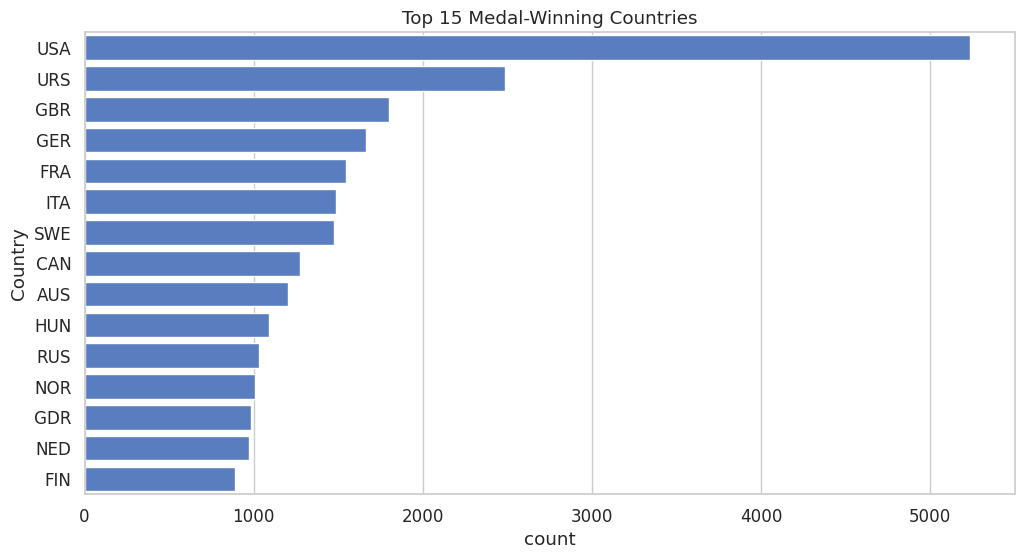

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y="Country", data=olympics[olympics["Medal"]!="No Medal"],
              order=olympics[olympics["Medal"]!="No Medal"]["Country"].value_counts().head(15).index)
plt.title("Top 15 Medal-Winning Countries")
plt.show()


### Comparing Summer vs Winter for top 10 countries
Here we compare how medals are distributed between the Summer and Winter Games for the top 10 medal-winning countries.


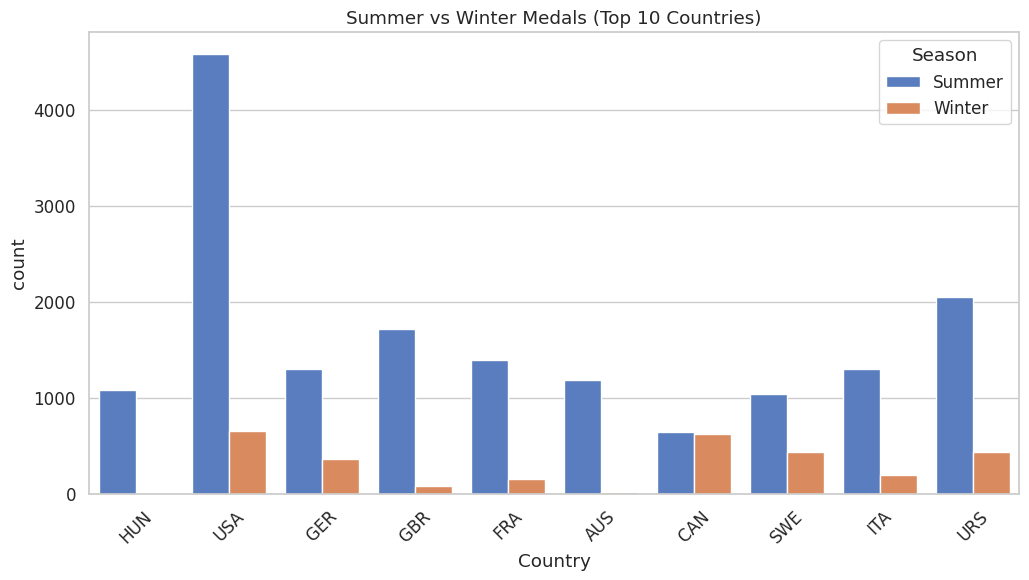

In [ ]:
top_countries = olympics[olympics["Medal"]!="No Medal"]["Country"].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.countplot(x="Country", hue="Season", data=olympics[(olympics["Country"].isin(top_countries)) & (olympics["Medal"]!="No Medal")])
plt.title("Summer vs Winter Medals (Top 10 Countries)")
plt.xticks(rotation=45)
plt.show()


### Distribution of Medal Types
This graph shows the distribution of medal types (Gold, Silver, and Bronze) for all Olympic athletes.


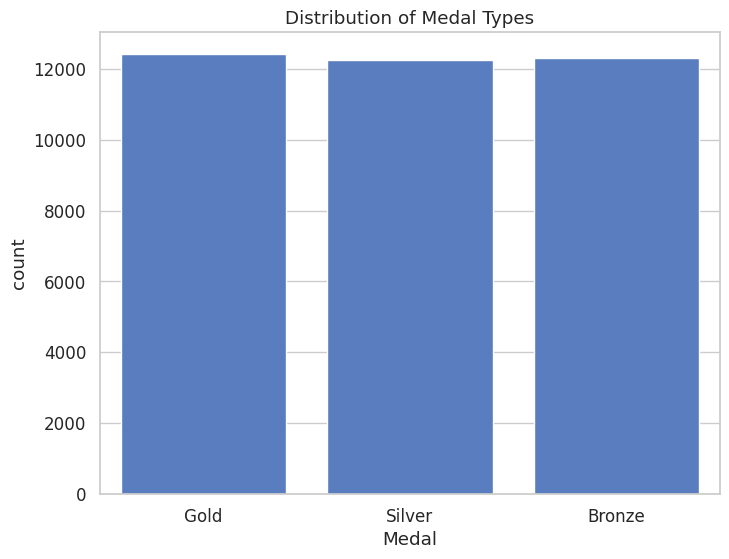

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="Medal", data=olympics[olympics["Medal"]!="No Medal"], order=["Gold","Silver","Bronze"])
plt.title("Distribution of Medal Types")
plt.show()


### Medal Distribution by Gender
This visualization shows how medals are distributed between male and female athletes.


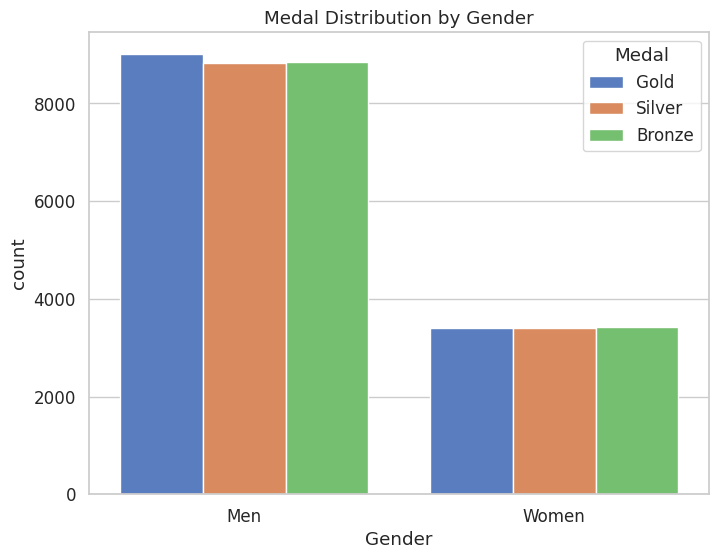

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x="Gender", hue="Medal", data=olympics[olympics["Medal"]!="No Medal"])
plt.title("Medal Distribution by Gender")
plt.show()


### Athlete Participation Over Time
This graph displays the growth of athlete participation in the Olympics over the decades.


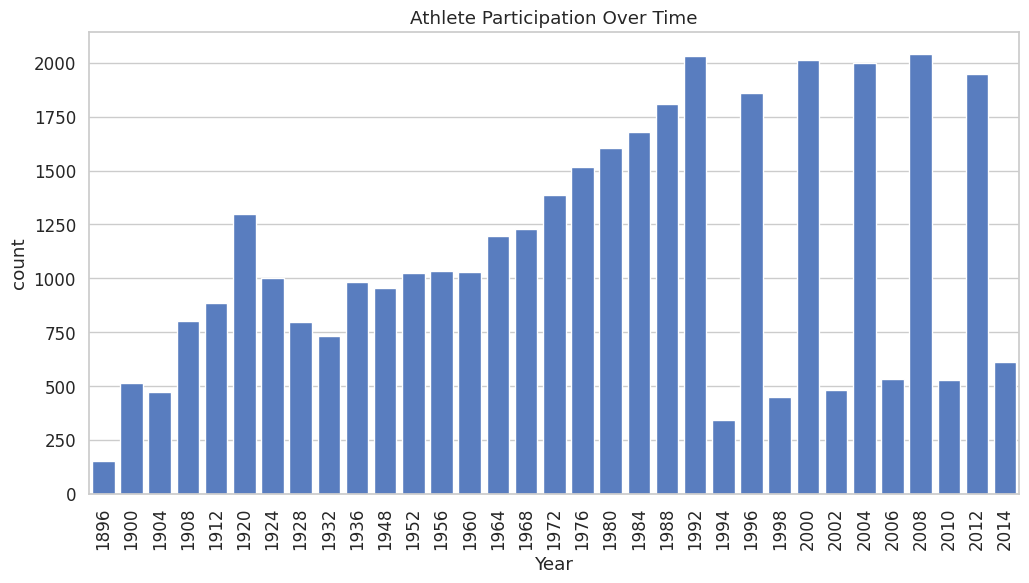

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="Year", data=olympics, order=sorted(olympics["Year"].unique()))
plt.title("Athlete Participation Over Time")
plt.xticks(rotation=90)
plt.show()


### Top 10 Sports by Medal Count
This graph highlights the sports with the most medals awarded across all Olympic Games.


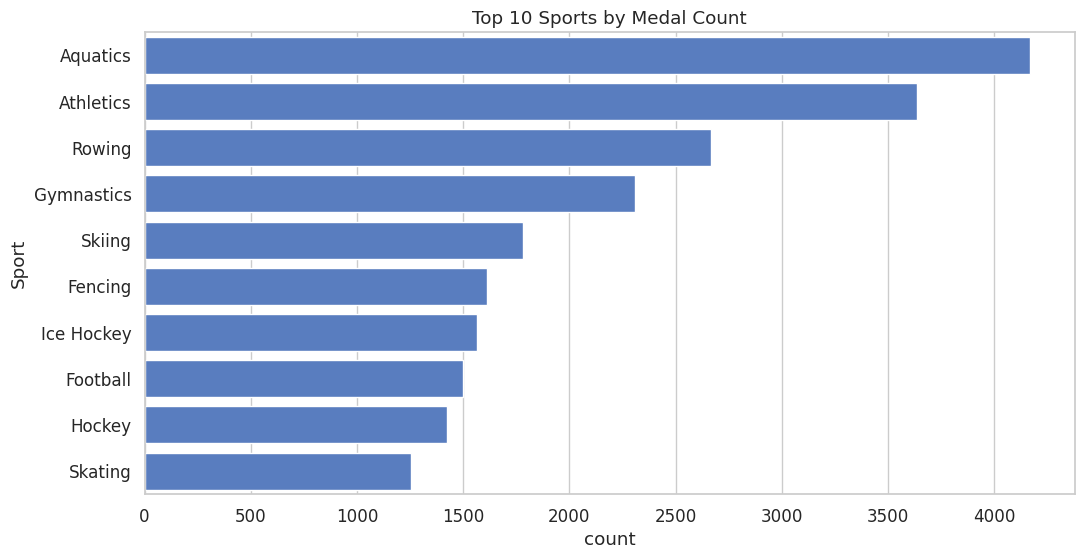

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(y="Sport", data=olympics[olympics["Medal"]!="No Medal"],
              order=olympics[olympics["Medal"]!="No Medal"]["Sport"].value_counts().head(10).index)
plt.title("Top 10 Sports by Medal Count")
plt.show()


### Countries vs Sports (Heatmap)
This heatmap visualizes how different countries perform across various sports by showing medal counts.


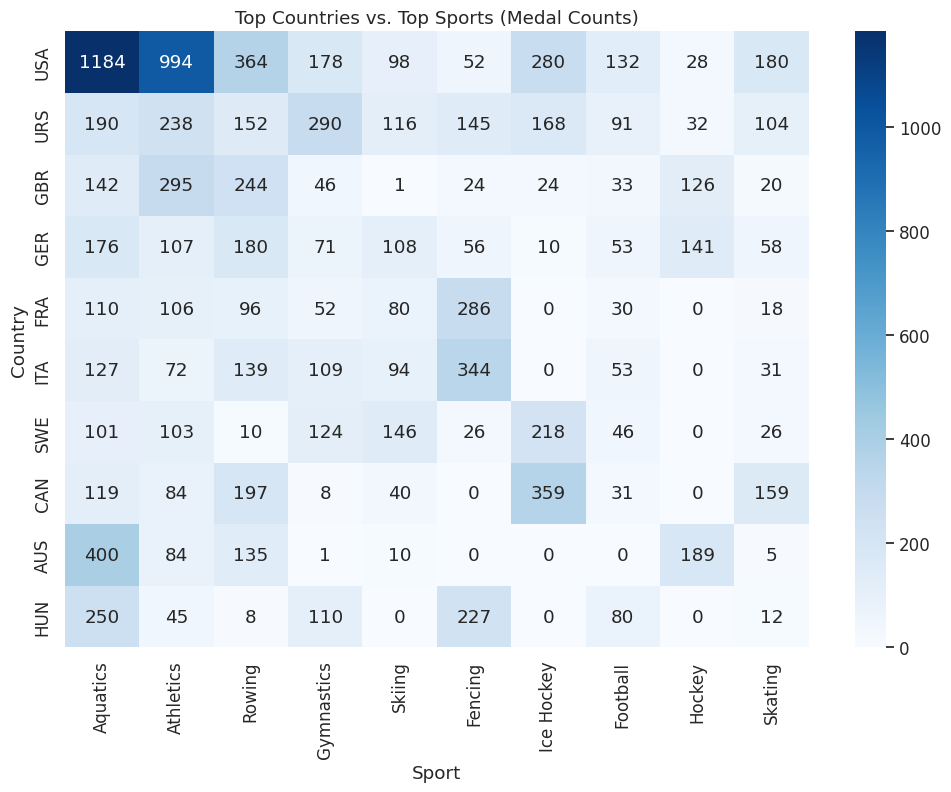

In [ ]:
pivot = olympics[olympics["Medal"]!="No Medal"].pivot_table(index="Country", columns="Sport", values="Medal", aggfunc="count").fillna(0)
top_c = pivot.sum(axis=1).sort_values(ascending=False).head(10).index
top_s = pivot.sum(axis=0).sort_values(ascending=False).head(10).index
plt.figure(figsize=(12,8))
sns.heatmap(pivot.loc[top_c, top_s], annot=True, fmt=".0f", cmap="Blues")
plt.title("Top Countries vs. Top Sports (Medal Counts)")
plt.show()


### GDP per Capita vs Medal Count
This scatter plot shows the relationship between a country's GDP per capita and the number of medals it won.


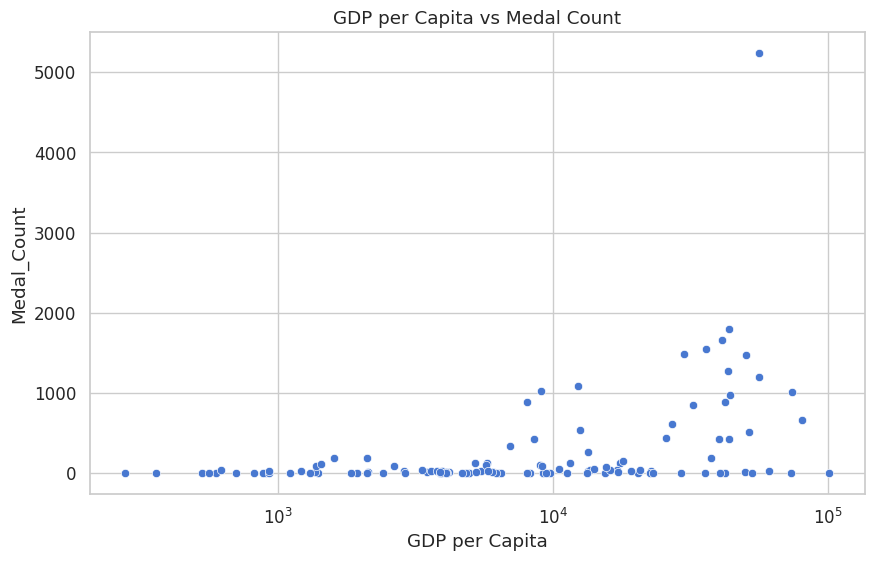

In [ ]:
medals_country = olympics[olympics["Medal"]!="No Medal"].groupby("Country").size().reset_index(name="Medal_Count")
merged = medals_country.merge(dictionary, left_on="Country", right_on="Country_Code", how="left")

plt.figure(figsize=(10,6))
sns.scatterplot(x="GDP per Capita", y="Medal_Count", data=merged)
plt.xscale("log")
plt.title("GDP per Capita vs Medal Count")
plt.show()


### Population vs Medal Count
This scatter plot compares countries' population with their medal counts.


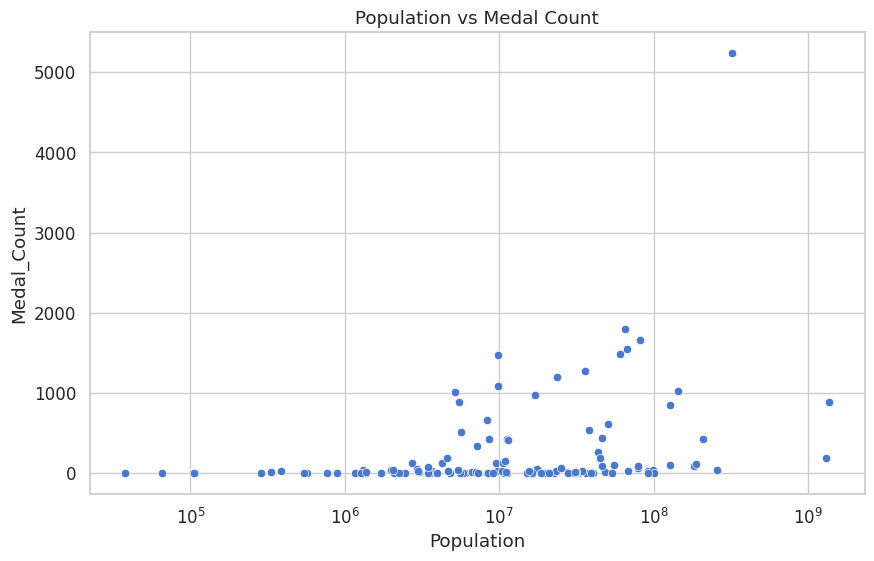

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Population", y="Medal_Count", data=merged)
plt.xscale("log")
plt.title("Population vs Medal Count")
plt.show()


### Medals per Million People
This graph shows the countries with the most medals per million people in terms of population size.


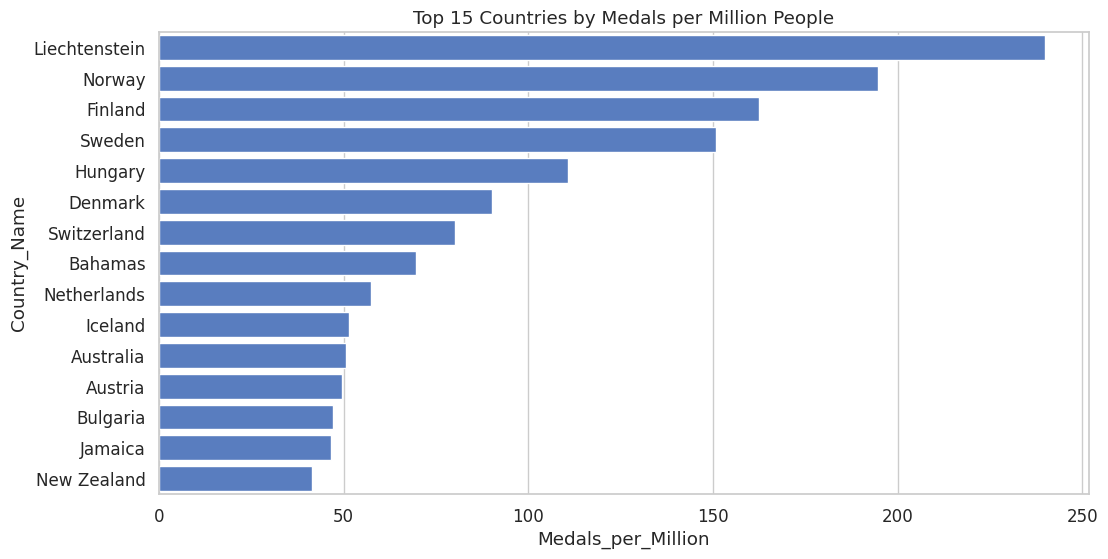

In [ ]:
merged["Medals_per_Million"] = merged["Medal_Count"] / (merged["Population"]/1e6)
top_medals_per_capita = merged.sort_values("Medals_per_Million", ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(x="Medals_per_Million", y="Country_Name", data=top_medals_per_capita)
plt.title("Top 15 Countries by Medals per Million People")
plt.show()


### Track and Field Analysis

Most Successful Athletes in Track and Field: Explore track and field events specifically (like the 100m, 200m, etc.) to analyze medal trends and identify dominant athletes.

Most Frequent Medalists: Find out which athletes have the most Olympic medals overall.

In [ ]:
track_field = olympics[olympics["Sport"].str.contains("Athletics")]
top_athletes = track_field.groupby("Athlete")["Medal"].count().reset_index(name="Medal_Count").sort_values("Medal_Count", ascending=False)
top_athletes_top10 = top_athletes.head(10)

def highlight_top_athletes(s):
    return ['background-color: gold' if v == 1 else 'background-color: silver' if v == 2 else 'background-color: bronze' if v == 3 else '' for v in s]

top_athletes_top10_styled = top_athletes_top10.style.apply(highlight_top_athletes, subset=['Medal_Count'])

top_athletes_top10_styled


,Athlete,Medal_Count
1744,"NURMI, Paavo",12
1391,"LEWIS, Carl",10
1793,"OTTEY-PAGE, Merlene",9
655,"EWRY, Ray",8
1997,"RITOLA, Ville",8
337,"CAMPBELL-BROWN, Veronica",7
2312,"SZEWINSKA, Irena",7
2283,"STRICKLAND-DE LA HUNTY, Shirley",7
672,"FELIX, Allyson",6
2259,"STECHER, Renate",6


### Line Graph of Medal Counts by Year

This graph will show how the total number of medals awarded at the Olympics has evolved over time.

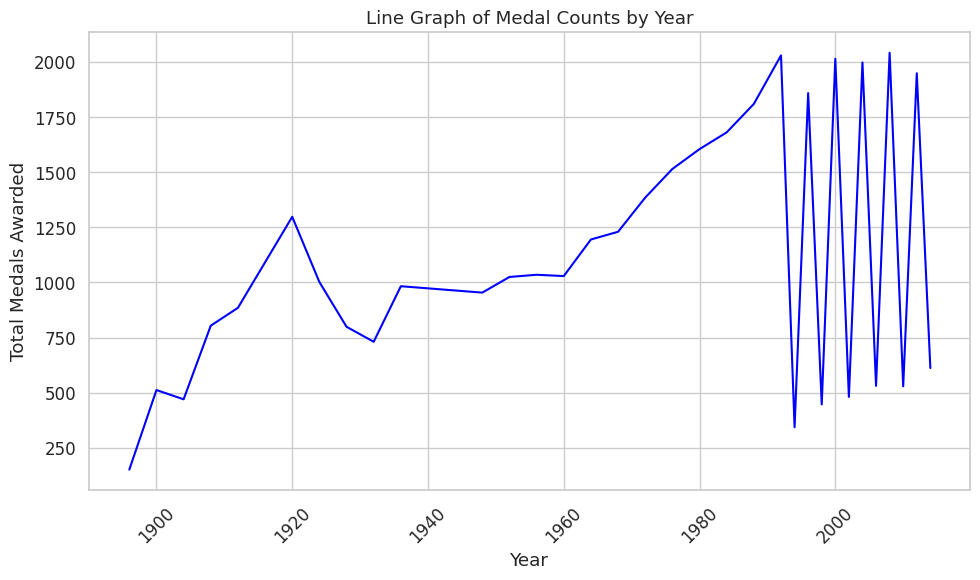

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming olympics dataframe is already loaded and cleaned
# Grouping data by year and counting the medals awarded in each year
medal_counts_by_year = olympics[olympics["Medal"] != "No Medal"].groupby("Year").size()

# Plotting the line graph
plt.figure(figsize=(10, 6))
medal_counts_by_year.plot(kind='line', color='blue')
plt.title("Line Graph of Medal Counts by Year")
plt.xlabel("Year")
plt.ylabel("Total Medals Awarded")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


### Line Graph of Athlete Participation by Year

This graph will show the trend in the number of athletes participating in the Olympics over time.

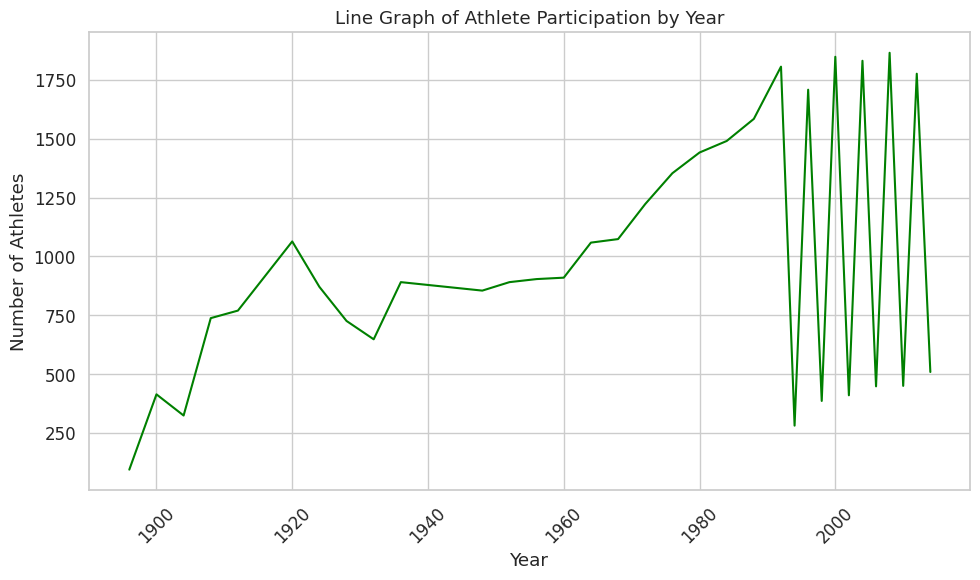

In [32]:
# Grouping data by year and counting the number of unique athletes
athlete_participation_by_year = olympics.groupby("Year")["Athlete"].nunique()

# Plotting the line graph
plt.figure(figsize=(10, 6))
athlete_participation_by_year.plot(kind='line', color='green')
plt.title("Line Graph of Athlete Participation by Year")
plt.xlabel("Year")
plt.ylabel("Number of Athletes")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()
